In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import datetime
import glob
import pickle
from datetime import datetime, timedelta
import sys

#import the folder that has the analysis level class
sys.path.append("../CombinedData/")
import Dataset

In [2]:
#top directory of datasets, containing sub-folders like "ds05, ..."
#change this to match where you are running this notebook, relative to your data location. 
topdir = "/p/lustre2/nexouser/data/StanfordData/angelico/hv-test-chamber/Run5/"
#the sub-folders
datasets = ["cosmics-5-3/", "ds03/", "ds04/", "ds05/", "ds06/", \
            "ds07/","ds08/","ds09/","ds10/","ds11/","ds12/","ds13/","ds15/","ds16/",\
            "ds17/","ds18/","ds19/","ds20/","ds21/","ds22/","ds23/","ds24/","ds25/"]

#choose a single one, for single dataset exploration
ds_single = "ds20/"

#config file, that contains info on analysis settings
config = "../configs/run5_config.yaml"

In [3]:
#load the dataset object for the single file selected
ds = Dataset.Dataset(topdir+ds_single, config)

In [4]:
#look at struck files and count the number of events in each. 
#each struck file has possibly a variable number of events, 
#and they are ordered chronologically in time based on when
#the events arrived. 
for f in ds.struck_files:
    df, date = pickle.load(open(f, "rb")) #opens the pandas dataframe object in the pickle file
    nevts = len(df.index)
    t_i = df["Seconds"].iloc[0] #timestamp of first event in 0th channel in seconds since start of day
    t_f = df["Seconds"].iloc[1]
    #add that seconds value to the date of the dataset, in a python datetime format
    t_i = date + timedelta(seconds=t_i)
    t_f = date + timedelta(seconds=t_f)
    
    print("In file {} there are {:d} events and times ranging from {} to {}".format(f.split('/')[-1], nevts, t_i, t_f))

In file prereduced_0.p there are 785 events and times ranging from 2023-05-10 20:49:18.319905 to 2023-05-10 20:49:18.623966
In file prereduced_1.p there are 3804 events and times ranging from 2023-05-10 20:52:38.193334 to 2023-05-10 20:52:38.205759
In file prereduced_10.p there are 4834 events and times ranging from 2023-05-10 21:22:56.006056 to 2023-05-10 21:22:56.125091
In file prereduced_11.p there are 13845 events and times ranging from 2023-05-10 21:26:18.005301 to 2023-05-10 21:26:18.023240
In file prereduced_12.p there are 23019 events and times ranging from 2023-05-10 21:29:40.000757 to 2023-05-10 21:29:40.008348
In file prereduced_13.p there are 27345 events and times ranging from 2023-05-10 21:33:02.002166 to 2023-05-10 21:33:02.005574
In file prereduced_14.p there are 16673 events and times ranging from 2023-05-10 21:36:24.003263 to 2023-05-10 21:36:24.007940
In file prereduced_15.p there are 12741 events and times ranging from 2023-05-10 21:39:46.002366 to 2023-05-10 21:39:

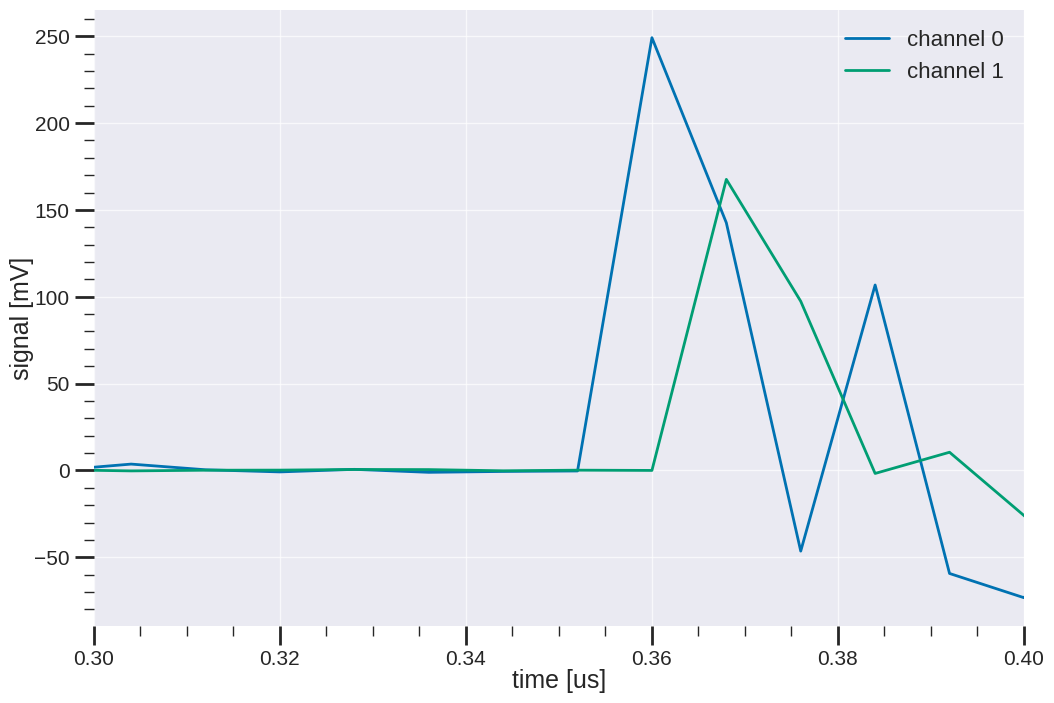

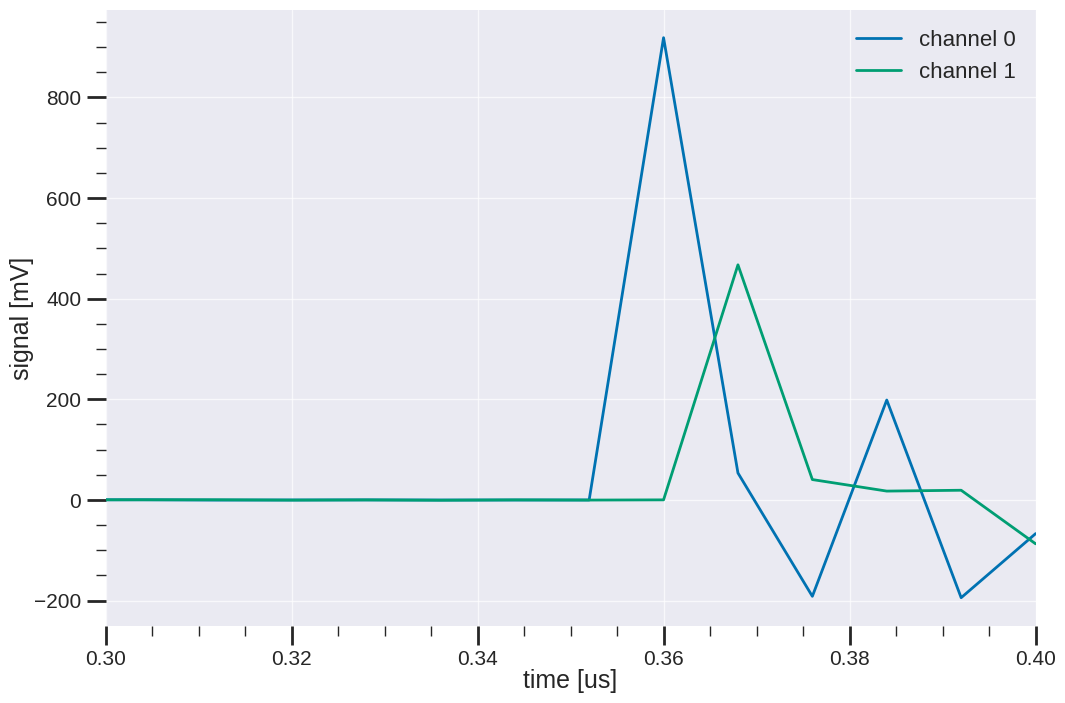

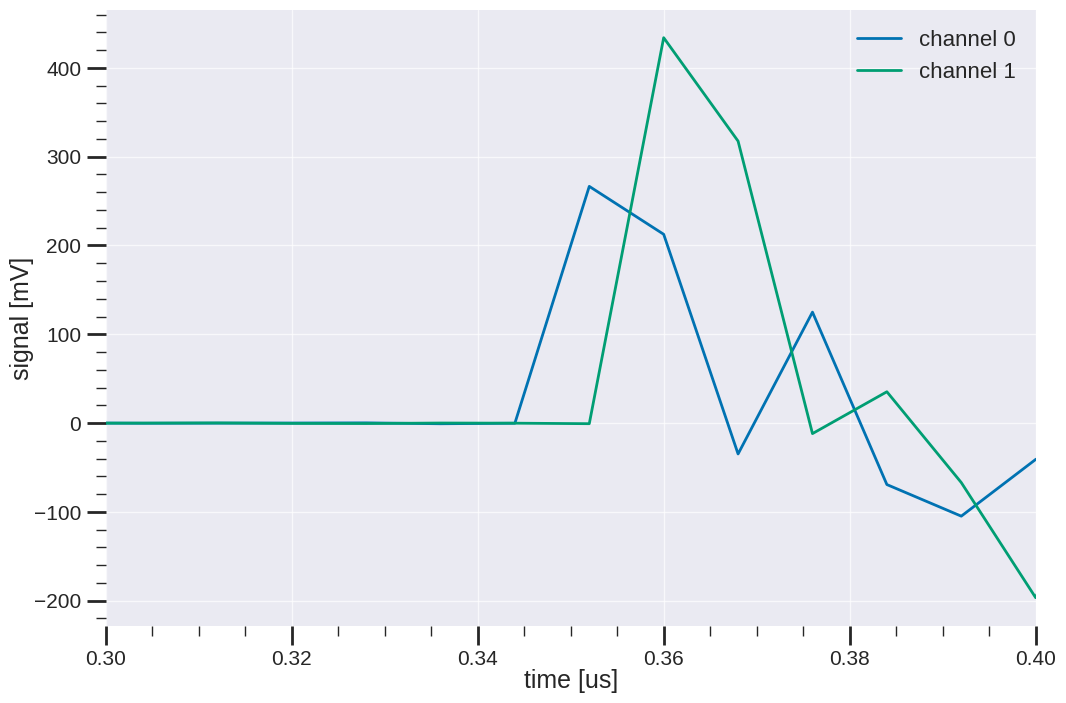

In [7]:
file_of_interest = "prereduced_6.p"

#number of plots desired
nplots = 3

#in the config file, which is loaded by the dataset object, 
#there is a parameter for sampling rate. Grab that (the dataset object has parsed the config file)
dsconf = ds.config
sampling_rate = float(dsconf["struck_reduction"]["clock"]) #Hz 
dT = 1.0/sampling_rate #seconds
dT = dT*1e6 #microseconds

for f in ds.struck_files:
    if(file_of_interest in f):
        df, date = pickle.load(open(f, "rb")) #opens the pandas dataframe object in the pickle file
        nevts = len(df.index)
        #get random, non-repeating event numbers within the bounds of this dataframe
        rand_idx = np.random.choice(range(nevts), nplots, replace=False)
        for idx in rand_idx:
            fig, ax = plt.subplots(figsize=(12, 8))
            evt = df.iloc[idx]
            times = np.arange(0, len(evt["Data"][0])*dT, dT) #times in microseconds
            ax.plot(times, evt["Data"][0], label="channel 0")
            ax.plot(times, evt["Data"][1], label="channel 1")
            ax.set_xlabel("time [us]")
            ax.set_ylabel("signal [mV]")
            ax.set_xlim([0.3, 0.4])
            ax.legend()
            plt.show()

        